# Capstone Project

### Author: Maximilian Ayling 
### Project Submission - Emeritus Imperial College Business Analytics: From Data to Decisions
#### (To go alongside .ppt presentation)

The HeartSafe problem can be regarded as an optimisation problem with 2 degrees of freedom (DOF) $x,y$, where we are trying to maximise the function for total profit:

$$25x+30y,$$

subject to the following constraint:

$$\frac{x}{200}+\frac{y}{140} \leq 40.$$

Additionally, each DOF is an integer contained within the bounds:
$$ 0.0 \leq x \leq 6000,$$
$$ 0.0 \leq y \leq 4000,$$

We choose the initial condition,  $i_0$, to be origin: 
$$i_0 = [0.0,0.0].$$

Note that because we have 2 DOF, the origin is also defined to have 2 points.

## Using Python to solve an optimisation problem:


To solve the optimisation problem I will use `SciPy optimize` as it provides functions for minimising objective functions, subject to constraints.

In [1]:
#Import the SciPy optimize function:
from scipy.optimize import minimize

### Defining the Objective Function:

Note, maximising $25x+30y$ is equivalent to minimising $-25x-30y$.

In [2]:
def objective_fun(x):
    return -25*x[0] - 30*x[1]

### Defining the constraints:

The constraint $\frac{X}{200}+\frac{Y}{140} \leq 40$ can be rearranged to a form constraints are taken in SciPy:

$40-\frac{X}{200}-\frac{Y}{140} \geq 0$ 

In [3]:
def constraint1(x):
    return 40-x[0]/200-x[1]/140

This constraint is an inequality, so define it as such using a dictionary:

In [4]:
con1 = {"type": "ineq", "fun" : constraint1}

And add this constraint into a list (so other constraints can be added more easily in future):

In [5]:
cons=[con1]

### Define the bounds:

Define tuples for the bounds of type x and type y devices:

In [6]:
b_0 = (0.0, 6000.0)
b_1 = (0.0, 4000.0)
bnds = (b_0,b_1)

### Initial Guess:

In [7]:
i_0 = [0,0]

### Solve the optimisation problem:

In [8]:
sol = minimize(objective_fun,  i_0, method='SLSQP', bounds = bnds, constraints = cons)

### Visualise the solution:

In [9]:
print(sol)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -192000.00000110743
       x: [ 6.000e+03  1.400e+03]
     nit: 14
     jac: [-2.500e+01 -3.000e+01]
    nfev: 63
    njev: 14


### Understanding the Solution:

In [43]:
print('To maximise weekly profits subject to the constraint of working hours, ',round(sol['x'][0]), 'Type X devices '
     'and',round(sol['x'][1]), 'Type Y devices a week should be manufactured.' )

To maximise weekly profits subject to the constraint of working hours,  6000 Type X devices and 1400 Type Y devices a week should be manufactured.


### Sense check:

The maximum number of Type X devices to make a week is 6000, so the maximum number of Type X devices is being made. The maximum number of Type Y devices to make a week is 4000. The optimal solution here makes 1400 Type Y devices, 2600 less per week than the maximum number of Type Y devices made per week. 

Finding the optimal solution is a balance between selling more of the device that has a higher profit per device (Type Y) and making the highest total number of devices per week. Looking at the solution, it turns out the balance is heavily towards maximising the highest total number of devices per week. This can be seen by the above - the maximum number of Type X devices is being made, and it is not possible to reduce Type X by one and increase Type Y by one as rate constraint would not be satisfied. To satisfy the rate constraint and increase the number of Type Y devices by one, a few less Type X devices would need to be made, which the optimal solution shows is less profitable. 

The optimal solution recommends the machine running for 30 hours making Type X devices and 10 hours making Type Y devices.



### Conclusion:

First Q:

Is it feasible to produce any type of device and sell them? 

Answer:

The production machine is operable for 40 hours a week and has the capability to produce Type X and Type Y devices. I have assumed we have access to no other machines to produce any other type of device. Type X devices sell for \\$25 a unit and Type Y devices sell for \\$30 a unit. 


Second Q:

Is it better to produce only one type of device or both? If you decide to produce 
both, in what proportion should each be produced? 

Answer:

6000 devices is the weekly maximum production limit (due to person hours and capacity of specialists) for Type X. They can be made at a rate of 200 per hour. Making only Type X devices until the maximum production limit would take 30 hours, which leaves 10 hours spare for the machine to make Type Y devices.
Similarly, 4000 devices is the maximum production limit for Type Y. They can be made at a rate of 140 per hour. Making only Type Y devices until the maximum production limit would take 28.6 (1.d.p) hours, which leaves 11.4 hours spare for the machine to make Type X devices.Therefore, with a machine working for 40 hours a week it is possible to manufacture both types of device. The machine should work for the full 40 hours a week, as each device will sell for either \\$25 or \\$30 a unit. Therefore, you should produce both devices each week.
To calculate the proportion of each, I have solved an optimisation problem that balances between selling more of the device that has a higher profit per device (Type Y) and making the highest total number of devices per week. The solution, and therefore my recommendation to the board, is: 

In [45]:
print('To maximise weekly profits subject to the constraint of working hours,',round(sol['x'][0]), 'Type X devices '
     'and',round(sol['x'][1]), 'Type Y devices a week should be manufactured.' )

To maximise weekly profits subject to the constraint of working hours, 6000 Type X devices and 1400 Type Y devices a week should be manufactured.


### Maximum Profit:

Third Q:

Calculate the final profit of the production of devices. 

Answer:

This can be found from the negative (as I solved the problem by minimising the negative of the objective function) of the objective function value:

In [51]:
print('The maximum weekly profit is  $', -round(sol['fun']))

The maximum weekly profit is  $ 192000


Fourth Q:

Include in your analysis:

-	what would happen if your product presents any defects, 

-	how to compete in a market that is new for you,

-	what you would do if you overproduce devices,

-	what you would do if they undersell


Answer:

If one of the Type Y devices present a defect, they cannot be sold. A likely Acceptable Quality Level (AQL) for this product is 2.5% (see link) https://www.investopedia.com/terms/a/acceptable-quality-level-aql.asp#:~:text=The%20AQL%20for%20major%20defects,1 . 1400 Type Y devices a week in the optimal solution means we can expect 35 Type Y devices to present defects. This reduces the maximum weekly profit by 

\\$35 per device * 30 devices = \\$900.

Additionally, as this is a new product there may be a lag time to bringing Type Y devices to market when compared to Type X devices. This is due to prototyping and approval through standard health regulation structures, as well as setting up new production and distribution lines. The business may want to consider therefore reducing the initial number of Type Y devices to produce until these intial processes are complete. If the business were to reduce Type Y production, I would recommend hiring temporary Type X production specialists. This would increase the weekly production limit of Type X and mean the business can use the machine to manufacture more total devices per week, increasing weekly total profits.

Alternatively, the specialists that no longer need to produce Type Y devices initially could be repurposed to focus on marketing to help sell this product in a market that goes beyond the heart rate monitoring provided by Type X devices and opens up the market for devices which can detect the early onset of a variety of medical issues including fainting, COPD and hypoxia.

If too many Type Y devices are produced, consider not selling the extra products to avoid saturating the market. Use the extra devices to test experimental features and further improve the product, or consider offering these products as an incentive for the Type Y specialist team for working hard and overproducing, which would improve employee satisfaction.

If Type Y devices undersell, consider investing profits from Type X device sales into market research for the Type Y devices.






### Graphing the Solution Space:

In [60]:
import matplotlib.pyplot as plt
import numpy as np

The objective here is to plot the three constraints on a Type Y device vs Type X device plot, to highlight an area which would satisfy the three constraints (and therefore justify a solution must exist).

First, note again the three constraints:

$$\frac{x}{200}+\frac{y}{140} \leq 40.$$

Additionally, each DOF is an integer contained within the bounds:
$$ 0.0 \leq x \leq 6000,$$
$$ 0.0 \leq y \leq 4000.$$

The first inequality can be drawn by plotting a line representing all Type X and Type Y values that correspond to using the machinery for the maximum 40 hours a day. The solution space would then be all values closer to the origin than this line. Expressing this line in the straight line form:
$$y= -\frac{140x}{200}+5600. $$

The other inequalities on the plot will be straight lines:
$$x=6000, $$
$$y=4000. $$

Plotting these three lines, green, red and blue respectively, produces:

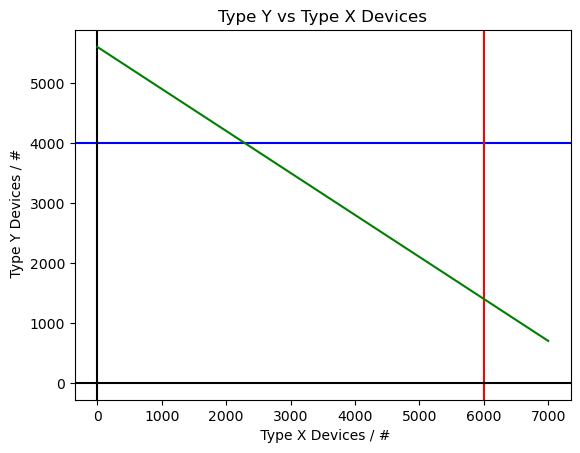

In [99]:
x=np.linspace(0,7000,7001)
plt.axhline(y = 4000, color='b')
plt.axvline(x = 6000,color='r')
plt.axvline(x = 0.,color='k')
plt.axhline(y=0.,color='k')
plt.plot(x,(-140*x)/200+5600,color='g')
plt.title('Type Y vs Type X Devices')
plt.xlabel(' Type X Devices / #')
plt.ylabel(' Type Y Devices / #')
plt.show()